# Mounting Drive and Installing Modules

In [0]:
## Import general system modules
from google.colab import drive
from google_drive_downloader import GoogleDriveDownloader
from itertools import product
from itertools import chain
import random 
import pickle
import gzip
import sys
import os

In [0]:
drive.mount('/content/gdrive')
models_dir = '/content/gdrive/My Drive/Colab/otto/base_models'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib
from sklearn.manifold import TSNE
#!pip install tsnecuda
from sklearn.decomposition import PCA
import umap
from imblearn.over_sampling import SMOTE
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functio

# Importing Data and creating transformed datasets

In [0]:
train = pd.read_csv("/content/gdrive/My Drive/Colab/otto/train.csv", index_col = 0)
test = pd.read_csv("/content/gdrive/My Drive/Colab/otto/test.csv", index_col = 0)

In [0]:
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

In [0]:
train_zero_scaled = train.drop(['target'], axis=1)
train_mean_scaled = train.drop(['target'], axis=1)

train_zero_scaled = pd.DataFrame(min_max_scaler.fit_transform(train_zero_scaled))
test_zero_scaled = pd.DataFrame(min_max_scaler.fit_transform(test))

train_mean_scaled = pd.DataFrame(standard_scaler.fit_transform(train_mean_scaled))
test_mean_scaled = pd.DataFrame(standard_scaler.fit_transform(test))

# UMAP



In [0]:
DATA =  test_zero_scaled


UMAP_Instance = umap.UMAP(n_components =  9,      ## The dimension of the space to embed into.
                         min_dist = 1,            ## The effective minimum distance between embedded points. Smaller values will result in a more clustered/clumped embedding
                         spread = 2.0,            ## The effective scale of embedded points. In combination with min_dist this determines how clustered/clumped the embedded points are.
                         n_neighbors = 15,        ## The size of local neighborhood (in terms of number of neighboring sample points) used for manifold approximation.
                         metric = 'euclidean',    ## The metric to use to compute distances in high dimensional space.  (euclidean, manhattan, cosine, )
                         learning_rate = 0.1,     ## Controls the step during the gradient descent stage
                         n_epochs = int(1e3),     ## selected based on the size of the input dataset (200 for large datasets, 500 for small)
                         random_state =  1,       
                         verbose = 2,                
                        )

result = UMAP_Instance.fit_transform(DATA)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=0.1, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=1, n_components=9, n_epochs=1000,
     n_neighbors=15, negative_sample_rate=5, random_state=1,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=2.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=2)
Construct fuzzy simplicial set
Mon Mar  9 21:07:31 2020 Finding Nearest Neighbors
Mon Mar  9 21:07:31 2020 Building RP forest with 24 trees


/usr/local/lib/python3.6/dist-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../usr/local/lib/python3.6/dist-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))


Mon Mar  9 21:07:58 2020 NN descent for 17 iterations


/usr/local/lib/python3.6/dist-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../usr/local/lib/python3.6/dist-packages/umap/utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
/usr/local/lib/python3.6/dist-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../usr/local/lib/python3.6/dist-packages/umap/nndes

	 0  /  17
	 1  /  17
	 2  /  17
	 3  /  17
Mon Mar  9 21:08:42 2020 Finished Nearest Neighbor Search
Mon Mar  9 21:08:49 2020 Construct embedding


/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 15 separate connected components using meta-embedding (experimental)
  n_components


	completed  0  /  1000 epochs
	completed  100  /  1000 epochs
	completed  200  /  1000 epochs
	completed  300  /  1000 epochs
	completed  400  /  1000 epochs
	completed  500  /  1000 epochs
	completed  600  /  1000 epochs
	completed  700  /  1000 epochs
	completed  800  /  1000 epochs
	completed  900  /  1000 epochs
Mon Mar  9 21:26:16 2020 Finished embedding


In [0]:
_ = joblib.dump(result, models_dir + '/test-UMAP9', compress=9)

<function matplotlib.pyplot.show>

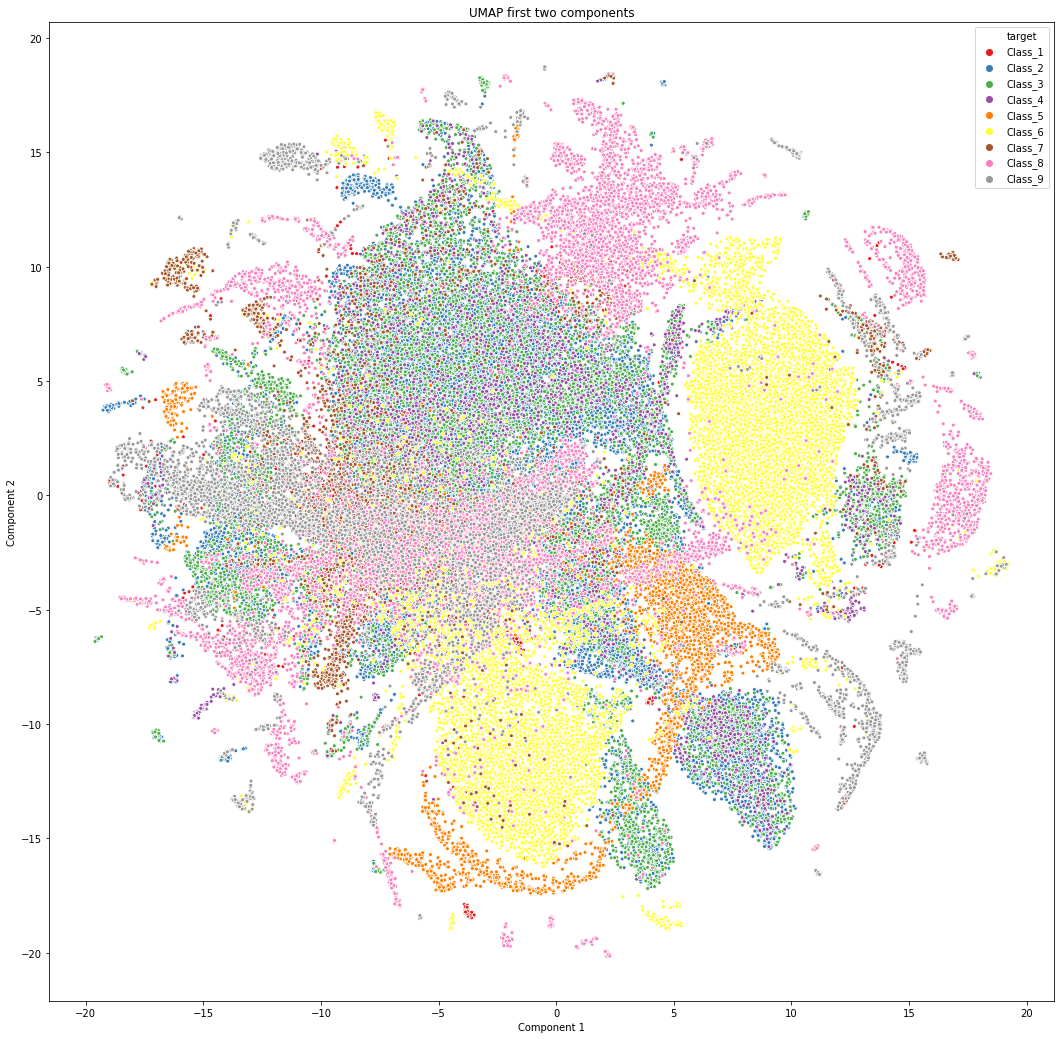

In [0]:
plt.figure(figsize=(18,18))
ax = sns.scatterplot(result[:, 0], result[:, 1], hue = train.iloc[:,93], palette='Set1', s=15)

plt.title('UMAP first two components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.show

# T-SNE

In [0]:
DATA_TSNE =  train_zero_scaled

TSNE_Instance = TSNE(n_components =  2,         ## Controls the number of dimebsuibs if the embedded space
                    perplexity = 40,          ## Perplexity controls how to balance attention between local and global aspects of your data 
                    early_exaggeration = 1,    ## Controls how tight natural clusters are situated
                    learning_rate = 50,        ## Controls the step during the gradient descent stage
                    n_iter = int(2e3),          ## Max number of iterations         ## Random seed 
                    verbose = 2,
                    n_jobs= -1, 
                   )

TSNE_results = TSNE_Instance.fit_transform(DATA_TSNE)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 61878 samples in 5.364s...
[t-SNE] Computed neighbors for 61878 samples in 254.657s...
[t-SNE] Computed conditional probabilities for sample 1000 / 61878
[t-SNE] Computed conditional probabilities for sample 2000 / 61878
[t-SNE] Computed conditional probabilities for sample 3000 / 61878
[t-SNE] Computed conditional probabilities for sample 4000 / 61878
[t-SNE] Computed conditional probabilities for sample 5000 / 61878
[t-SNE] Computed conditional probabilities for sample 6000 / 61878
[t-SNE] Computed conditional probabilities for sample 7000 / 61878
[t-SNE] Computed conditional probabilities for sample 8000 / 61878
[t-SNE] Computed conditional probabilities for sample 9000 / 61878
[t-SNE] Computed conditional probabilities for sample 10000 / 61878
[t-SNE] Computed conditional probabilities for sample 11000 / 61878
[t-SNE] Computed conditional probabilities for sample 12000 / 61878
[t-SNE] Computed conditional probabilities for 

In [0]:
_ = joblib.dump(TSNE_results, models_dir + '/train-TSNE3', compress=9)

In [0]:
_ = joblib.dump(TSNE_results, models_dir + '/test-TSNE3', compress=9)

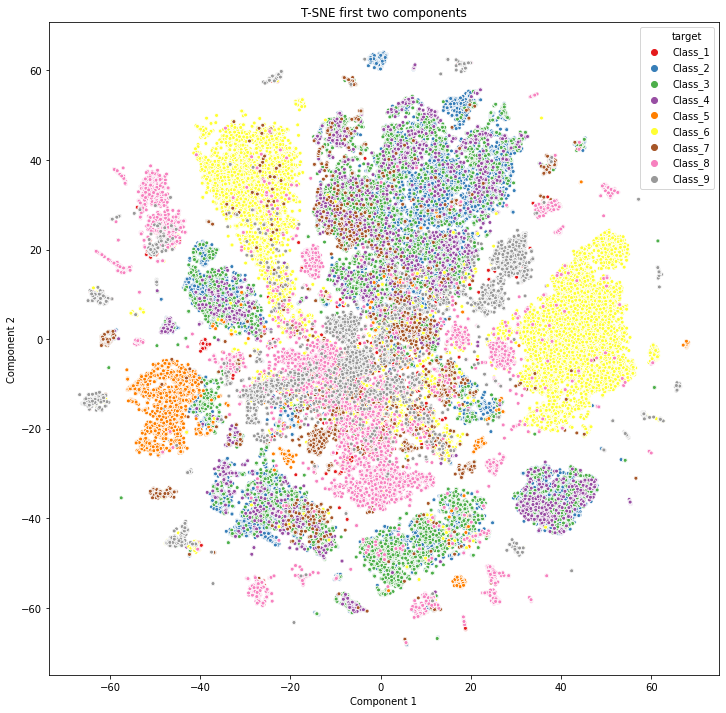

In [0]:
plt.figure(figsize=(12,12))
ax = sns.scatterplot(TSNE_results[:, 0], TSNE_results[:, 1], hue = train.iloc[:,93], palette='Set1', s=15)

plt.title('T-SNE first two components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# PCA

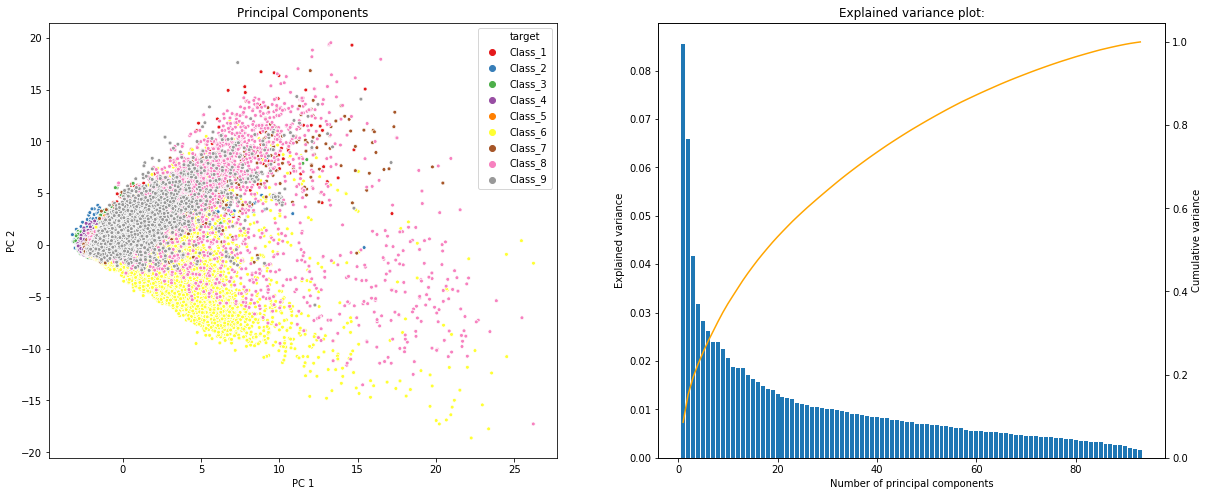

In [0]:
PCA_DATA = train_mean_scaled

pca_instance = PCA().fit(PCA_DATA)
 
pca = pd.DataFrame(pca_instance.transform(PCA_DATA), index = PCA_DATA.index)

fig, ax = plt.subplots(figsize=(20,8),nrows = 1 , ncols = 2)

sns.scatterplot(x = pca.iloc[:,0], y = pca.iloc[:,1], ax = ax[0], hue = train.iloc[:,93], palette='Set1', s=15)
ax[0].set_title('Principal Components')
ax[0].set_xlabel("PC 1")
ax[0].set_ylabel("PC 2")

ax[1].bar(x = [i+1 for i in range(pca_instance.n_components_)], height  = pca_instance.explained_variance_/ np.sum(pca_instance.explained_variance_))

ax2 = ax[1].twinx()
ax2.plot([i+1 for i in range(pca_instance.n_components_)],  np.cumsum(pca_instance.explained_variance_)/ np.sum(pca_instance.explained_variance_), c = 'orange')
ax2.grid([])
ax2.set_ylim(bottom =0)

ax[1].set_title('Explained variance plot:')
ax[1].set_xlabel('Number of principal components')
ax[1].set_ylabel('Explained variance')
ax2.set_ylabel('Cumulative variance')

plt.show()

# Saving components 

In [0]:
fname = 'base_models_dir/train-UMAP
_ = joblib.dump(stack_train, fname, compress=9)